In [1]:
import matplotlib.pyplot as plt
from ekpy import control
from ekpy.control.instruments import keysight81150a
from scipy import interpolate
import numpy as np


2


In [2]:
rm = control.ResourceManager()
rm.list_resources()

('GPIB0::8::INSTR', 'USB0::0x0957::0x17A6::MY63080078::0::INSTR')

In [3]:
wavegen = rm.open_resource('GPIB0::8::INSTR')

In [4]:
keysight81150a.idn(wavegen)

'Agilent Technologies,81150A,MY53821602,3.0.0.0-4.6\n'

In [8]:
from singlePVhysteresis import pv_hysteresis_wf

In [10]:
q_time_arr, time_array, waveform_freq, interp_time_arr, interp_voltage_array = pv_hysteresis_wf('0.0001', '10', '0.001', '1')
#keysight81150a.create_arbitrary_waveform(wavegen, interp_voltage_array, 'PV')
voltage_array = [0,0,1,-1,0,0,1,-1,0,0,-1,1,0,0,-1,1,0,0]
temp = interpolate.interp1d(time_array, voltage_array)
interp_voltage_array = temp(interp_time_arr)
keysight81150a.create_arb_wf(wavegen, interp_voltage_array)


:DATA VOLATILE, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014401440144013834,0.0324032403240318,0.05040504050404977,0.06840684068406774,0.0864086408

In [11]:
keysight81150a.configure_arb_wf(wavegen, '1', 'VOLATILE', freq='800')

In [6]:
keysight81150a.create_arb_wf(wavegen, voltage_array)

:DATA VOLATILE, 0,0,1,-1,0,0,1,-1,0,0,-1,1,0,0,-1,1,0,0


In [9]:
wavegen.write(":DATA VOLATILE, 1,0,-1,0,1,0,-1,0,1")

37

In [8]:
#now i just need to interpolate the data correctly, to 10k points

:DATA VOLATILE, 1,2,3,4,5


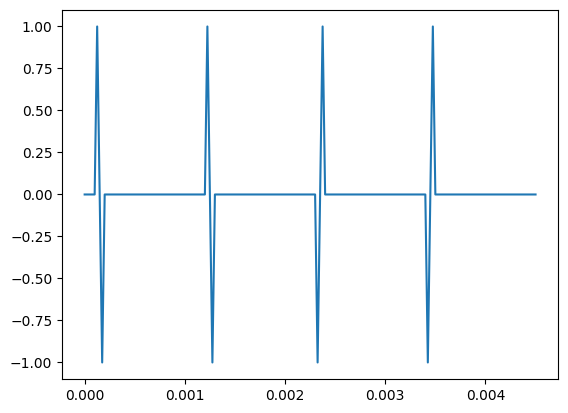

In [25]:
plt.plot(time_array, voltage_array)
plt.show()

In [5]:
keysight81150a.initialize(wavegen)
keysight81150a.configure_impedance(wavegen, '1', source_impedance='50.0', load_impedance='1000000')
#keysight81150a.configure_impedance(wavegen, '1', source_impedance='50.0', load_impedance='50.0')
keysight81150a.configure_arb_waveform(wavegen, '1', 'VOLATILE', gain='2', freq='1000')

In [8]:
keysight81150a.enable_output(wavegen, on=False)

In [9]:
keysight81150a.enable_output(wavegen)


In [13]:
keysight81150a.configure_impedance(wavegen)

In [11]:
keysight81150a.configure_arb_waveform(wavegen, channel='1', name='ARB1', offset='2')

In [6]:
mydata = [-1,1,3]

In [7]:
keysight81150a.create_arbitrary_waveform(wavegen, mydata)

In [18]:
keysight81150a.enable_output(wavegen, on=False)

InvalidSession: Invalid session handle. The resource might be closed.

In [10]:
rm.close()

In [11]:
inst.close()

NameError: name 'inst' is not defined

In [17]:
wavegen.close()